  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(112, 4) (38, 4)
ACC: 0.9736842105263158


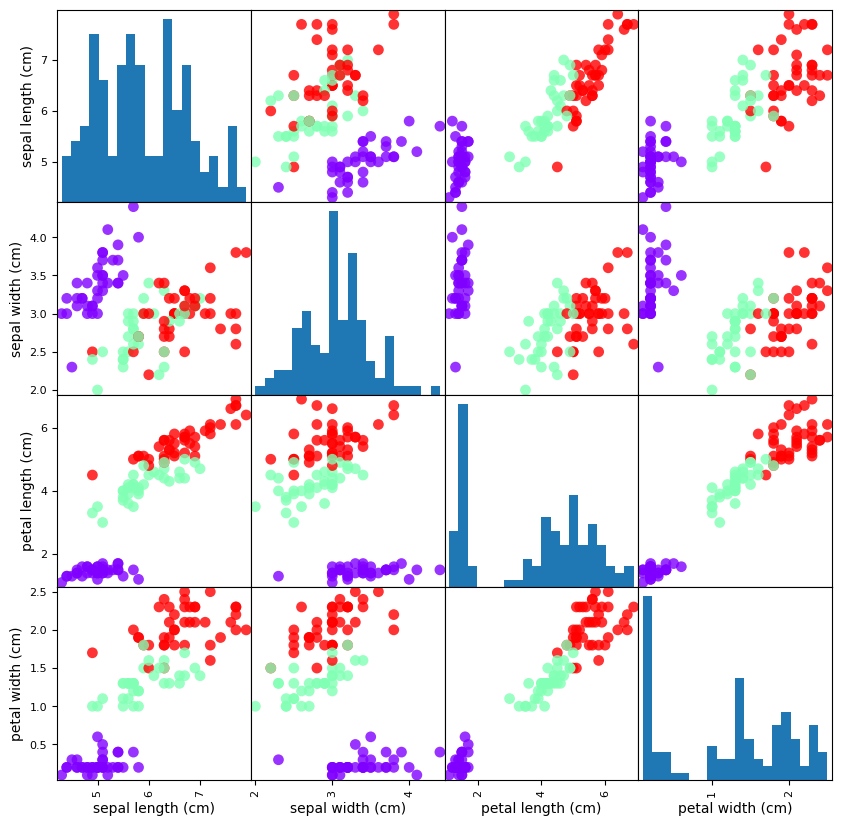

In [1]:
# Müller % Guido (2016) - Introduction to Machine Learning
# https://github.com/amueller/introduction_to_ml_with_python (supplemantary Material)

# Chapter 1 Introduction
import numpy as np

# scipy hat die Möglichkeit, eine Sparse-Matrix zu erstellen
from scipy import sparse
print(sparse.csr_matrix(np.eye(4)))

# Iris-Datensatz und ÜBerblick über die Daten
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()
# Datensatz ist ein dictionair mit verschiedenen Elementen
print(data.keys())
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)
print(X_train.shape, X_test.shape)

# umwandeln in Dategrame

X_train_df = pd.DataFrame(X_train, columns = data['feature_names'])
pd.plotting.scatter_matrix(X_train_df, c=y_train, figsize=(10,10),
                          marker="o", hist_kwds={'bins': 20}, s=60, alpha = 0.8, cmap='rainbow')

# Erstes Modell
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("ACC:", model.score(X_test, y_test))


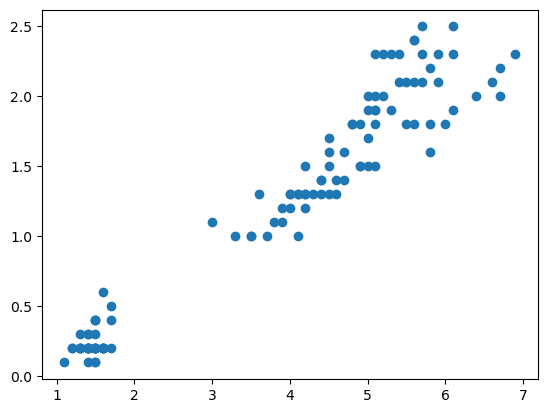

In [2]:
# Chapter 2: Supervised MachineLearning

plt.scatter(X_train_df['petal length (cm)'], X_train_df['petal width (cm)'])


In [5]:
# Value Counts in Series-Objekten
import pandas as pd
test = ['male']*50 + ["female"]*80

test = pd.Series(test)
print(test.value_counts())

test = pd.DataFrame(test, columns=["test"])
print(pd.get_dummies(test).head())

female    80
male      50
Name: count, dtype: int64
   test_female  test_male
0        False       True
1        False       True
2        False       True
3        False       True
4        False       True


In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
iris = load_iris()
mod = LogisticRegression(max_iter=200)

cross_val_score(mod, iris.data, iris.target, cv=5)

res = pd.DataFrame(cross_validate(mod, iris.data, iris.target, cv=5, return_train_score=True))

res = res.T
res[:, "mean"] = res.mean(axis=1)
res.columns = ["0", "1", "2", "3", "4", "mean"]
display(res)

,0,1,2,3,4,mean
fit_time,0.011454,0.017598,0.009667,0.010703,0.009891,0.011863
score_time,0.001011,0.000000,0.001507,0.000000,0.001072,0.000718
test_score,0.966667,1.000000,0.933333,0.966667,1.000000,0.973333
train_score,0.966667,0.966667,0.983333,0.983333,0.975000,0.975000


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

In [16]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

text_test = [doc.replace(b"<br />", b" ") for doc in text_train]
print(np.bincount(y_test))

[12500 12500]


In [20]:
# Umgang mit Textdaten - Umwandeln in Word Counts
print(text_train[6])
# b" ". da ein byte-type String benötigt wird
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
print("\n")
print("Sample per Class:", np.bincount(y_train))

bards_words = ["The fool doth think he is wise",
              "but the wise man knows himself to be a fool"]

vect = CountVectorizer()
vect.fit(bards_words)
print(vect.vocabulary_)
bag_of_words = vect.transform(bards_words)

# Umwandeln der Trainingsdaten
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))
# Zeigt, dass 25000 Texte mit einem Vokabular von 74849 Worten erfasst wurden

b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


Sample per Class: [12500 12500]
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [21]:
feature_names = vect.get_feature_names_out()
print(feature_names[:20])
(feature_names[20010:20030])
# Zahlen bis auf 007 haben sicher keine Bedeutung, ebenso müssen stopwords und lemmatization durchgeführt werden (draw, drawn, draws > ein Wort und drawers und drawer ebenfalls)

# Erstes Modell
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(tol=0.001, max_iter=300)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("mean_performance", np.mean(scores))

from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Cross_val score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
mean_performance 0.8800800000000001
Best Cross_val score: 0.88892
Best Parameters: {'C': 0.1}


In [23]:
# Entferne Stopwords und sehr seltene Worte
vect = CountVectorizer(min_df=5, stop_words = "english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))
# Worte deutlich reduziert

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(list(ENGLISH_STOP_WORDS)[::15])

scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(scores, np.mean(scores))


<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>
['could', 'after', 'up', 'except', 'down', 'still', 'becoming', 'next', 'hers', 'fifteen', 'noone', 'you', 'between', 'enough', 'cannot', 'not', 'four', 'upon', 'third', 'been', 'during', 'they']
[0.8706 0.8752 0.8814 0.8742 0.8738] 0.87504


In [26]:
# tfidf-Vektorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Da der TfidfVectorizer() hier verwendet wird, muss bei fit die Datei mit den Texten mitgegeben werden
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid={"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8928
{'logisticregression__C': 10}


In [180]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)

# extrahiert höchsten Wert für das Wort aus allen Dokumenten
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = np.argsort(max_value)

print(max_value[sorted_by_tfidf[0:10]]) # niedrigsten Werte
print(max_value[sorted_by_tfidf[-10:]]) # höchste Werte

names_by_tfidf = feature_names[sorted_by_tfidf]
feature_names = np.array(vectorizer.get_feature_names_out())
print("least important features\n", feature_names[sorted_by_tfidf[:20]])
print("most important features\n", feature_names[sorted_by_tfidf][-20:])

# Worte mit niedriger idf (kommen oft in den Dokumenten vor und sind daher weniger bedeutsam)
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Frequent features\n", feature_names[sorted_by_idf[:100]])

[0.04772161 0.06870964 0.07279712 0.07366212 0.07450353 0.07464024
 0.07560783 0.0768168  0.07718286 0.07745492]
[0.8262378  0.82696177 0.83191156 0.83700861 0.84221832 0.85613845
 0.85717128 0.87369408 0.87435507 0.92126397]
least important features
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
most important features
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']
Frequent features
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'


['A']

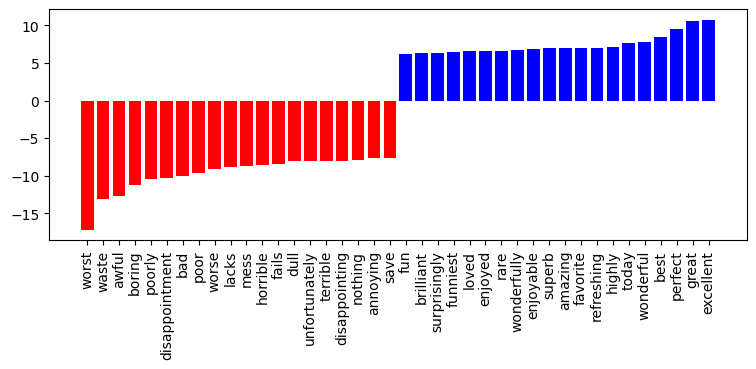

In [266]:
# Um mehr über das Modell herauszufinden, können die größten Koeffizienten des Regressinsmodells betrachtet werden

coeffs = grid.best_estimator_.named_steps["logisticregression"].coef_.ravel()
coeffs_idx = np.argsort(coeffs)
coeffs_sorted = coeffs[coeffs_idx]
max_coeffs = np.concatenate((coeffs_sorted[:20], coeffs_sorted[-20:]))


feature_names_sorted = feature_names[coeffs_idx]
c = ["red"]*20 + ["blue"]*20
max_features = np.concatenate((feature_names_sorted[:20], feature_names_sorted[-20:]))

plt.figure(figsize=(9,3))
plt.bar(max_features, max_coeffs, color=c)
plt.xticks(rotation=90)
["A"]

In [280]:
# Verwenden von n_grams, um den Kontext teilweise zu bewahren
print("bards_words:\n{}".format(bards_words))
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names_out())

# Bigramme
cv = CountVectorizer(ngram_range=(1, 2)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names_out())

# Betrachten der Reviews mit bi und trigrammen
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
            "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best Score:{:.2f}".format(grid.best_score_))
print("Best Parameter:\n{}".format(grid.best_params_))


bards_words:
['The fool doth think he is wise', 'but the wise man knows himself to be a fool']
13
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']
27
['be' 'be fool' 'but' 'but the' 'doth' 'doth think' 'fool' 'fool doth'
 'he' 'he is' 'himself' 'himself to' 'is' 'is wise' 'knows'
 'knows himself' 'man' 'man knows' 'the' 'the fool' 'the wise' 'think'
 'think he' 'to' 'to be' 'wise' 'wise man']
Best Score:0.91
Best Parameter:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


In [384]:
# Fortgeschrittene Tokenization, Advanced Stemming und Lemmatisierung
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print(lemmatizer.lemmatize("draws"))

def comp_normalization(doc: list):
    cv = CountVectorizer()
    cv.fit(doc)

    print([lemmatizer.lemmatize(token, pos="a") for token in cv.get_feature_names_out()])
    print([stemmer.stem(token) for token in cv.get_feature_names_out()])
test = ["Our meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow."]

lemmatizer.lemmatize?
comp_normalization(test)

draw
['clients', 'meeting', 'of', 'our', 'scared', 'than', 'the', 'today', 'tomorrow', 'was', 'bad', 'yesterday']
['client', 'meet', 'of', 'our', 'scare', 'than', 'the', 'today', 'tomorrow', 'wa', 'wors', 'yesterday']


Signature: lemmatizer.lemmatize(word: str, pos: str = 'n') -> str
Docstring:
Lemmatize `word` using WordNet's built-in morphy function.
Returns the input word unchanged if it cannot be found in WordNet.

:param word: The input word to lemmatize.
:type word: str
:param pos: The Part Of Speech tag. Valid options are `"n"` for nouns,
    `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"`
    for satellite adjectives.
:param pos: str
:return: The lemma of `word`, for the given `pos`.
File:      c:\users\manue\anaconda3\lib\site-packages\nltk\stem\wordnet.py
Type:      method

In [436]:
# Topic Modelling
# Latent Drichlet Allocation - meistverwendetes Verfahren für Topic Modelling
vect = CountVectorizer(max_features=10000, stop_words="english", ngram_range=(1, 2), max_df=.15)
# behält 10.000 features, die max in 15% der Dokumente vorkommen

X = vect.fit_transform(text_train)

In [438]:
from sklearn.decomposition import LatentDirichletAllocation
LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)

# Berechnen des Topic Modells
document_topics = lda.fit_transform(X)

In [434]:
print(lda.components_.shape)
# Komponents enthält einen Wert, der bestimmt, wie wichtig, das jweilige Wort für die 

# Betrachten der wichtigsten Worte für jede Topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

for i in range(0, 10):
    print(f"topic {i}:", feature_names[sorting[i]][:8])
# Topic 1 evtl War Filme

# tensorflow
# tutorial seq2seq for recurrent nural networks

(10, 10000)
topic 0: ['us' 'world' 'war' 'our' 'real' 'between' 'own' 'is not']
topic 1: ['saw' 'years' 'thought' 'watched' 'again' '10' 'am' 'didn']
topic 2: ['worst' 'the worst' 'minutes' 'thing' 'nothing' 'horror' 'awful'
 'the acting']
topic 3: ['funny' 'show' 're' 'doesn' 'comedy' 'lot' 'isn' 'thing']
topic 4: ['horror' 'cast' 'performance' 'director' 'quite' 'role' 'film is'
 'performances']
topic 5: ['series' 'show' 'episode' 'original' 'the first' 'the original' 'new'
 'the show']
topic 6: ['music' 'action' 'animation' 'effects' 'beautiful' 'disney' 'japanese'
 'the music']
topic 7: ['book' 'role' 'version' 'the book' 'cast' 'play' 'actors' 'performance']
topic 8: ['he is' 'guy' 'that he' 'gets' 'of his' 'father' 'himself' 'and his']
topic 9: ['woman' 'girl' 'she is' 'young' 'of her' 'house' 'mother' 'with her']
